In [1]:
import sys, os
sys.path.append('../src')
from NeutrinoFogFuncs import *
from NeutrinoFogPlotFuncs import *

In [2]:
from NeutrinoFuncs import BinnedNeutrinoRates, BinnedNeutrinoRates2
from WIMPFuncs import BinnedWIMPRate,MeanInverseSpeed_SHM,C_SI, BinnedWIMPRate2
from LabFuncs import FormFactorHelm
from Params import *
#==============================================================================#
ne = 50 # number of energy bins (anything >50 is accurate enough)
nm = 200 # number of mass points
m_vals = np.logspace(log10(0.1),log10(1.0e4),nm) # mass points
Flux_norm = NuFlux # See Params.py
Flux_err = NuUnc # See Params.py
E_th = 1.0e-4 # Threshold
E_max = 200.0 # Max recoil energy

Nuc = Xe131

R_nu = BinnedNeutrinoRates(E_th,E_max,ne,Nuc,Flux_norm)

In [3]:
mDM = 5.5
R_sig2 = BinnedWIMPRate(E_th,E_max,ne,np.array([mDM]),Nuc,C_SI,FormFactorHelm,MeanInverseSpeed_SHM)[0]

In [4]:
phi = 9.
fogDatGen1 = Fog(phiGen1)

In [5]:
exposureList = np.logspace(-3.,9.,120)
uncList = [0.01,0.03,0.1,0.3, 1.]
iEnd = len(R_nu[5][R_nu[5]>1.0e-10])
res = list(map(lambda x: fogDatGen1.sigmaExpoListGen(exposureList, R_sig2[0:iEnd], \
                                                      np.array([R_nu[5][0:iEnd]]), NuUnc[5:6]*x, phi), uncList))

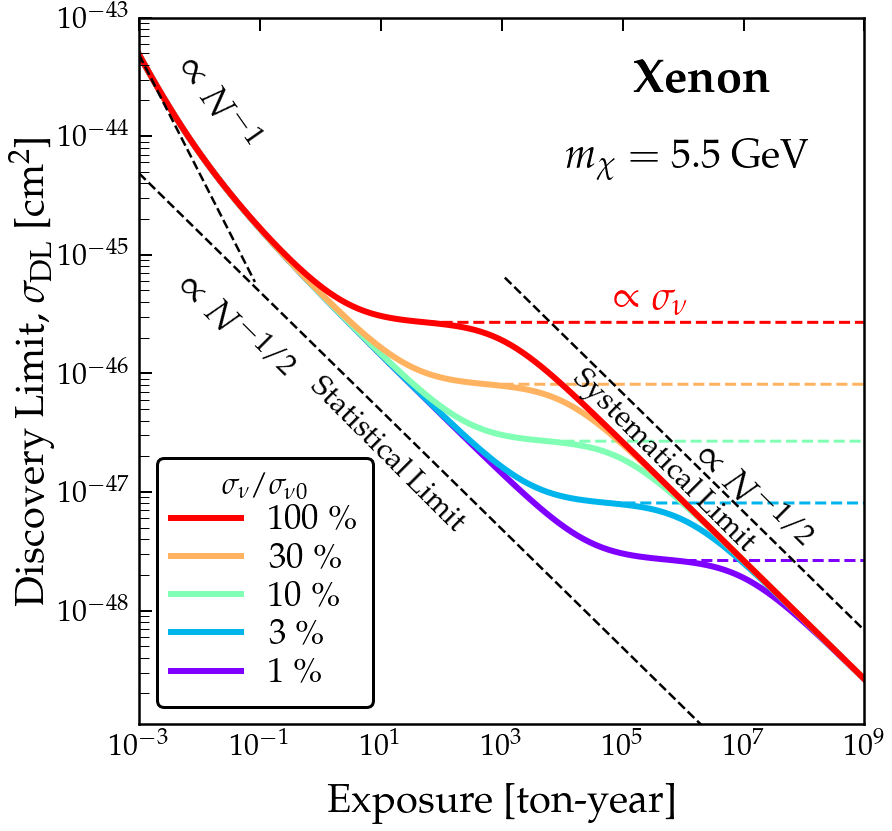

In [6]:
p1=SensitivityCurvePlot(res, Nuc, R_nu, uncList)

In [7]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p1.savefig(os.path.join(myPathFig,"DLCurves"+'.pdf'),bbox_inches='tight')
p1.savefig(os.path.join(myPathFig,'png','DLCurves.png'),bbox_inches='tight')